## Building a Pokemon Classifier

<img src="./images/pokemon_back.jpg"
     alt="pokemon_back.jpg"
     style="width: 800px;" />
        
Dataset Link - https://www.kaggle.com/thedagger/pokemon-generation-one
- has multiple images of each pokemon!
- 
Dataset Created by - 
##### Harshit Dwivedi 
(Mentor at Coding Blocks)



In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

2022-03-14 11:36:31.028149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 11:36:31.028187: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


- We can also use tensorflow, openCV or skimage.

In [3]:
p = Path("./Dataset/")  # create object
p.glob("*")  # pass regex "*" to glob() method.

<generator object Path.glob at 0x7f5b615d09e0>

In [9]:
p = Path("./Dataset/")
dirs = p.glob("*")

image_data = [] # to store all images data.
labels = []  # to store all labels

label_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}  # to make a mapping 
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"} # reverse mapping for conveting

for folder_dir in dirs: 
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(folder_dir)
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img) # convert image to np.array
        image_data.append(img_array)  # add every image to image_data
        labels.append(label_dict[label]) # add labels to labels dictionary.
        cnt += 1  # add count of images in a particular folder
        
    print(cnt)

Dataset/Pikachu
199
Dataset/Bulbasaur
171
Dataset/Meowth
70


## Visualisation

In [11]:
import numpy as np

In [12]:
print(len(image_data))
print(len(labels))

440
440


In [13]:
import random
random.seed(10) 

In [15]:
X = np.array(image_data)
Y = np.array(labels)

#Shuffle our data
#combined = list(zip(X,Y))
#random.shuffle(combined)
#X[:],Y[:] = zip(*combined) 

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalisation
X = X/255.0

In [22]:
print(Y)

[1 1 0 0 2 0 1 0 1 0 1 1 1 1 0 1 2 0 2 2 1 1 2 0 1 0 0 1 0 0 1 0 0 1 2 1 0
 2 0 0 1 1 2 0 0 0 1 1 1 2 1 0 0 1 2 1 2 0 0 0 2 0 0 0 0 0 0 1 0 0 2 1 0 1
 0 1 0 1 2 1 2 1 1 1 0 2 1 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0 2 2 0 2 1
 2 1 0 2 1 0 0 0 0 1 2 1 0 2 1 2 1 2 2 1 1 0 0 1 2 0 0 1 1 1 1 1 2 0 1 1 0
 0 2 0 2 1 0 1 0 1 1 0 1 0 1 2 0 1 0 1 2 1 0 1 1 0 0 2 2 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 2 1 1 0 1 1 0 0 1 0 0 0 1 1 1 2 0 0 1 0
 1 0 0 0 1 2 0 0 0 0 0 1 0 1 0 1 1 0 2 0 2 2 0 1 0 0 0 1 0 2 1 1 1 0 0 1 0
 0 0 1 0 1 0 1 0 2 0 1 1 1 0 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 1 0 1 0 2 2 0 0
 1 2 2 0 1 0 2 1 2 2 1 0 0 1 2 1 2 1 2 1 0 1 2 0 2 0 1 0 1 0 0 0 2 1 0 0 0
 1 2 2 2 0 0 1 0 1 1 1 2 0 0 1 0 1 2 1 1 2 1 0 0 0 0 2 1 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 1 1 0 0 2 1 1 1 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 1 2 0 0 0 1 0 1 1 0 0 0 1 0 0 2 1 1 1 0 1 2 0 0 1 1 0 1 0 0 0 0]


In [23]:
plt.style.use("dark_background")

In [24]:
# Draw some pokemons
def drawImg(img,label):
    plt.figure(figsize=(5,3))
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

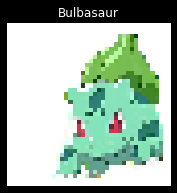

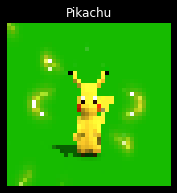

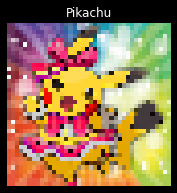

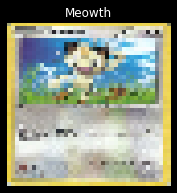

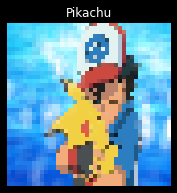

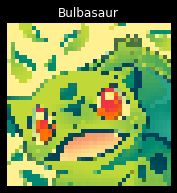

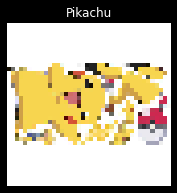

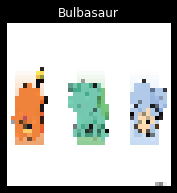

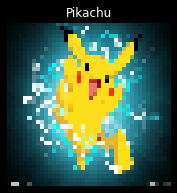

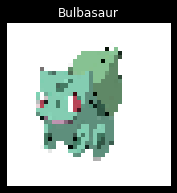

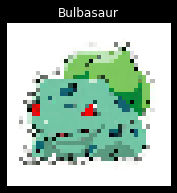

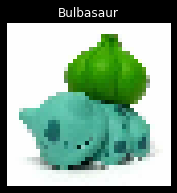

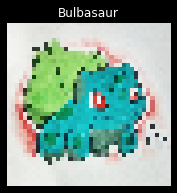

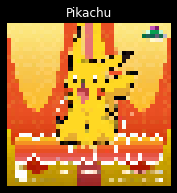

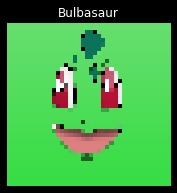

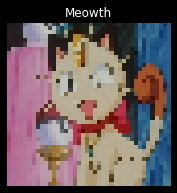

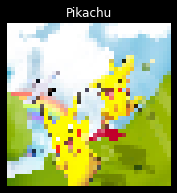

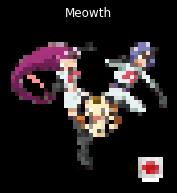

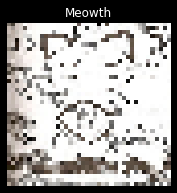

In [26]:
for i in range(1,20):
    drawImg(X[i].reshape(40,40,3),Y[i])  #4800 input units!

In [27]:
### Create Training and Testing Set
split = int(X.shape[0]*.8) # 80% for training and rest for testing.

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:split,:] # 80% for training and 20% for testing 
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(352, 40, 40, 3) (352,)
(88, 40, 40, 3) (88,)


- Copy Neural Networks implementation and training from "09_file.pdf"

In [28]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans        

In [29]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [30]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [31]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features(40X40X3)

In [33]:
print(X.shape)

(352, 40, 40, 3)


In [34]:
## flatten the image
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(352, 4800)
(88, 4800)


## Training and Overfitting:

In [35]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2101
Epoch 50 Loss 0.2657
Epoch 100 Loss 0.1501
Epoch 150 Loss 0.1013
Epoch 200 Loss 0.0806
Epoch 250 Loss 0.0648
Epoch 300 Loss 0.0555
Epoch 350 Loss 0.0462
Epoch 400 Loss 0.0402
Epoch 450 Loss 0.0360


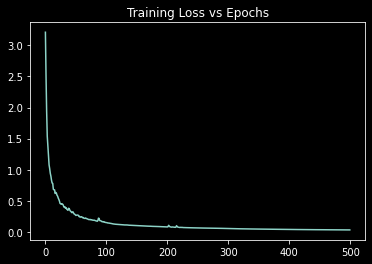

In [40]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

- Here we got 0 error after around 250 iterations.

## Neural Networks are prone to Overfitting !


In [38]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9744
Test Acc 0.6818


In [39]:
from sklearn.metrics import confusion_matrix

In [41]:
from visualize import plot_confusion_matrix

In [42]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y) # sklearn function to get confusion martrix
print(cnf_matrix)

[[154   2   2]
 [  0 132   3]
 [  1   1  57]]


Confusion matrix, without normalization
[[154   2   2]
 [  0 132   3]
 [  1   1  57]]


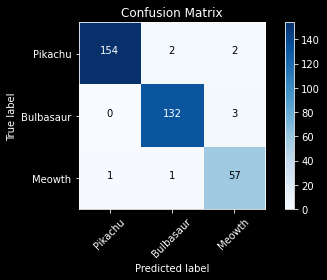

In [43]:
# sklearn function to plot confusion matrix
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       158
           1       0.98      0.98      0.98       135
           2       0.92      0.97      0.94        59

    accuracy                           0.97       352
   macro avg       0.96      0.97      0.97       352
weighted avg       0.98      0.97      0.97       352




## Testing predictions

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        44
           1       0.69      0.68      0.68        37
           2       0.12      0.14      0.13         7

    accuracy                           0.68        88
   macro avg       0.53      0.53      0.53        88
weighted avg       0.69      0.68      0.68        88

Confusion matrix, without normalization
[[34  7  3]
 [ 8 25  4]
 [ 2  4  1]]


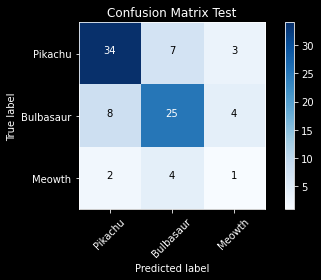

In [46]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix Test")


### Visualise Misclassifications in training set 


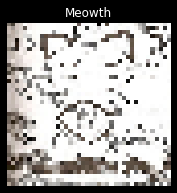

Prediction 19 Bulbasaur


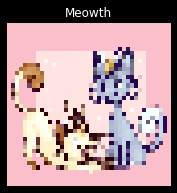

Prediction 121 Pikachu


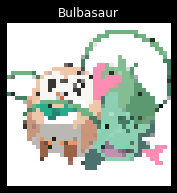

Prediction 159 Pikachu


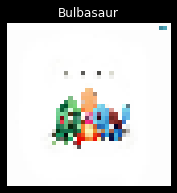

Prediction 226 Pikachu


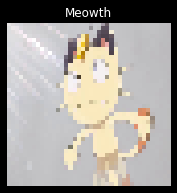

Prediction 251 Pikachu


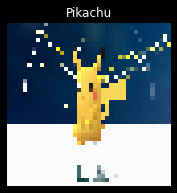

Prediction 259 Meowth


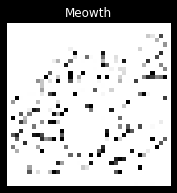

Prediction 312 Bulbasaur


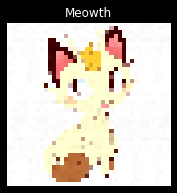

Prediction 320 Bulbasaur


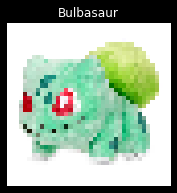

Prediction 333 Meowth


In [47]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))